In [241]:
!pip3 install ucimlrepo



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


# API Module

In [242]:
#https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data
from ucimlrepo import fetch_ucirepo 


Import Necessary Modules

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve


sns.set()

Fetch Dataset using API

In [244]:
# fetch dataset using API, we will recieve JSON (Dictionary type) data from API
statlog_german_credit_data = fetch_ucirepo(id=144) 
statlog_german_credit_data

{'data': {'ids': None,
  'features':     Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
  0          A11           6        A34        A43        1169        A65   
  1          A12          48        A32        A43        5951        A61   
  2          A14          12        A34        A46        2096        A61   
  3          A11          42        A32        A42        7882        A61   
  4          A11          24        A33        A40        4870        A61   
  ..         ...         ...        ...        ...         ...        ...   
  995        A14          12        A32        A42        1736        A61   
  996        A11          30        A32        A41        3857        A61   
  997        A14          12        A32        A43         804        A61   
  998        A11          45        A32        A43        1845        A61   
  999        A12          45        A34        A41        4576        A62   
  
      Attribute7  Attribute8 Attribute

Print the Fetched Dataset

In [245]:
#Extract the data from received JSON
statlog_german_credit_data = statlog_german_credit_data.data
statlog_german_credit_data

{'ids': None,
 'features':     Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
 0          A11           6        A34        A43        1169        A65   
 1          A12          48        A32        A43        5951        A61   
 2          A14          12        A34        A46        2096        A61   
 3          A11          42        A32        A42        7882        A61   
 4          A11          24        A33        A40        4870        A61   
 ..         ...         ...        ...        ...         ...        ...   
 995        A14          12        A32        A42        1736        A61   
 996        A11          30        A32        A41        3857        A61   
 997        A14          12        A32        A43         804        A61   
 998        A11          45        A32        A43        1845        A61   
 999        A12          45        A34        A41        4576        A62   
 
     Attribute7  Attribute8 Attribute9 Attribute10  Attribut

Column Details of the Dataset

<div class="overflow-x-auto"><table class="my-4 table w-full"><thead><tr><th>Variable Name</th><th>Role</th><th>Type</th><th>Demographic</th><th>Description</th><th>Units</th><th>Missing Values</th></tr></thead> <tbody><tr><td>Attribute1</td><td>Feature</td><td>Categorical</td><td></td><td>Status of existing checking account</td><td></td><td>no</td> </tr><tr><td>Attribute2</td><td>Feature</td><td>Integer</td><td></td><td>Duration</td><td>months</td><td>no</td> </tr><tr><td>Attribute3</td><td>Feature</td><td>Categorical</td><td></td><td>Credit history</td><td></td><td>no</td> </tr><tr><td>Attribute4</td><td>Feature</td><td>Categorical</td><td></td><td>Purpose</td><td></td><td>no</td> </tr><tr><td>Attribute5</td><td>Feature</td><td>Integer</td><td></td><td>Credit amount</td><td></td><td>no</td> </tr><tr><td>Attribute6</td><td>Feature</td><td>Categorical</td><td></td><td>Savings account/bonds</td><td></td><td>no</td> </tr><tr><td>Attribute7</td><td>Feature</td><td>Categorical</td><td>Other</td><td>Present employment since</td><td></td><td>no</td> </tr><tr><td>Attribute8</td><td>Feature</td><td>Integer</td><td></td><td>Installment rate in percentage of disposable income</td><td></td><td>no</td> </tr><tr><td>Attribute9</td><td>Feature</td><td>Categorical</td><td>Marital Status</td><td>Personal status and sex</td><td></td><td>no</td> </tr><tr><td>Attribute10</td><td>Feature</td><td>Categorical</td><td></td><td>Other debtors / guarantors</td><td></td><td>no</td> </tr><tr><td>Attribute11</td><td>Feature</td><td>Integer</td><td></td><td>Present residence since</td><td></td><td>no</td> </tr><tr><td>Attribute12</td><td>Feature</td><td>Categorical</td><td></td><td>Property</td><td></td><td>no</td> </tr><tr><td>Attribute13</td><td>Feature</td><td>Integer</td><td>Age</td><td>Age</td><td>years</td><td>no</td> </tr><tr><td>Attribute14</td><td>Feature</td><td>Categorical</td><td></td><td>Other installment plans</td><td></td><td>no</td> </tr><tr><td>Attribute15</td><td>Feature</td><td>Categorical</td><td>Other</td><td>Housing</td><td></td><td>no</td> </tr><tr><td>Attribute16</td><td>Feature</td><td>Integer</td><td></td><td>Number of existing credits at this bank</td><td></td><td>no</td> </tr><tr><td>Attribute17</td><td>Feature</td><td>Categorical</td><td>Occupation</td><td>Job</td><td></td><td>no</td> </tr><tr><td>Attribute18</td><td>Feature</td><td>Integer</td><td></td><td>Number of people being liable to provide maintenance for</td><td></td><td>no</td> </tr><tr><td>Attribute19</td><td>Feature</td><td>Binary</td><td></td><td>Telephone</td><td></td><td>no</td> </tr><tr><td>Attribute20</td><td>Feature</td><td>Binary</td><td>Other</td><td>foreign worker</td><td></td><td>no</td> </tr><tr><td>class</td><td>Target</td><td>Binary</td><td></td><td>1 = Good, 2 = Bad</td><td></td><td>no</td> </tr></tbody></table></div>

Get the Dataset and Label from the API Data

In [246]:
# data (as pandas dataframes) 
X = statlog_german_credit_data.features 
y = statlog_german_credit_data.targets 

Print Dataframe

In [207]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


Rename the Columns with Meaningful Names

In [208]:
dataset1 = X.rename(columns={
    "Attribute1": "Account_Status",
    "Attribute2": "Duration",
    "Attribute3": "Credit_History",
    "Attribute4": "Purpose",
    "Attribute5": "Credit_Amount",
    "Attribute6": "Savings_Account",
    "Attribute7": "Present_Employment_Since",
    "Attribute8": "Installment_Rate",
    "Attribute9": "Marital_Status",
    "Attribute10": "Guarantor",
    "Attribute11": "Present_Residence_Since",
    "Attribute12": "Property",
    "Attribute13": "Age",
    "Attribute14": "Other_Installment_Plans",
    "Attribute15": "Housing",
    "Attribute16": "Existing_Credit_Count",
    "Attribute17": "Job",
    "Attribute18": "Dependants",
    "Attribute19": "Telephone",
    "Attribute20": "Foreign_Worker",
    
})


Dataset with Meaningful Name Columns

In [209]:
dataset1

,Account_Status,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Present_Employment_Since,Installment_Rate,Marital_Status,Guarantor,Present_Residence_Since,Property,Age,Other_Installment_Plans,Housing,Existing_Credit_Count,Job,Dependants,Telephone,Foreign_Worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


Label Column, will be used for Training ML Model

In [210]:
label1 = y
label1

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


# Encoding and Converting All Columns to Numerical Values

In [211]:
dataset1["Account_Status"].replace("A1", "",inplace=True, regex=True)
dataset1["Account_Status"] = dataset1["Account_Status"].astype(int)


In [212]:
dataset1["Credit_History"].replace("A3", "",inplace=True, regex=True)
dataset1["Credit_History"] = dataset1["Credit_History"].astype(int)

In [213]:
dataset1["Purpose"].replace("A4", "",inplace=True, regex=True)
dataset1["Purpose"] = dataset1["Purpose"].astype(int)

In [214]:
dataset1["Savings_Account"].replace("A6", "",inplace=True, regex=True)
dataset1["Savings_Account"] = dataset1["Savings_Account"].astype(int)

In [215]:
dataset1["Present_Employment_Since"].replace("A7", "",inplace=True, regex=True)
dataset1["Present_Employment_Since"] = dataset1["Present_Employment_Since"].astype(int)

In [216]:
dataset1["Marital_Status"].replace("A9", "",inplace=True, regex=True)
dataset1["Marital_Status"] = dataset1["Marital_Status"].astype(int)

In [217]:
dataset1["Guarantor"].replace("A10", "",inplace=True, regex=True)
dataset1["Guarantor"] = dataset1["Guarantor"].astype(int)

In [218]:
dataset1["Property"].replace("A12", "",inplace=True, regex=True)
dataset1["Property"] = dataset1["Property"].astype(int)

In [219]:
dataset1["Other_Installment_Plans"].replace("A14", "",inplace=True, regex=True)
dataset1["Other_Installment_Plans"] = dataset1["Other_Installment_Plans"].astype(int)

In [220]:
dataset1["Housing"].replace("A15", "",inplace=True, regex=True)
dataset1["Housing"] = dataset1["Housing"].astype(int)

In [221]:
dataset1["Job"].replace("A17", "",inplace=True, regex=True)
dataset1["Job"] = dataset1["Job"].astype(int)

In [222]:
dataset1["Telephone"].replace("A19", "",inplace=True, regex=True)
dataset1["Telephone"] = dataset1["Telephone"].astype(int)

In [223]:
dataset1["Foreign_Worker"].replace("A20", "",inplace=True, regex=True)
dataset1["Foreign_Worker"] = dataset1["Foreign_Worker"].astype(int)

Final Encoded Dataset

In [224]:
dataset1["class"] = label1
dataset1

,Account_Status,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Present_Employment_Since,Installment_Rate,Marital_Status,Guarantor,...,Property,Age,Other_Installment_Plans,Housing,Existing_Credit_Count,Job,Dependants,Telephone,Foreign_Worker,class
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,2
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,2,1736,1,4,3,2,1,...,1,31,3,2,1,2,1,1,1,1
996,1,30,2,1,3857,1,3,4,1,1,...,2,40,3,2,1,4,1,2,1,1
997,4,12,2,3,804,1,5,4,3,1,...,3,38,3,2,1,3,1,1,1,1
998,1,45,2,3,1845,1,3,4,3,1,...,4,23,3,3,1,3,1,2,1,2


Marital / Gender Distribution Graph

<Axes: xlabel='Marital Status/ Gender', ylabel='Count'>

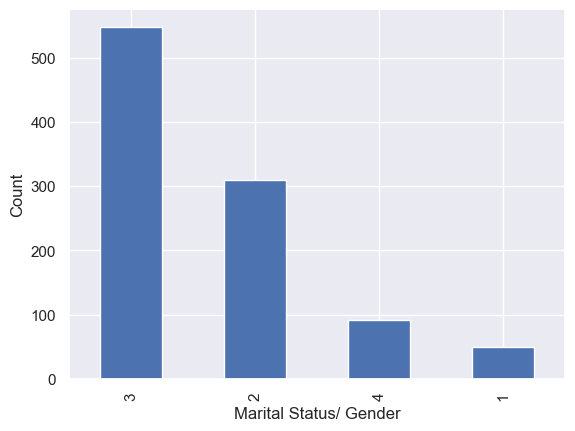

In [225]:
dataset1.Marital_Status.value_counts().plot.bar(xlabel="Marital Status/ Gender", ylabel="Count")

People who are Foreign Worker

<Axes: xlabel='Foreign Worker', ylabel='Count'>

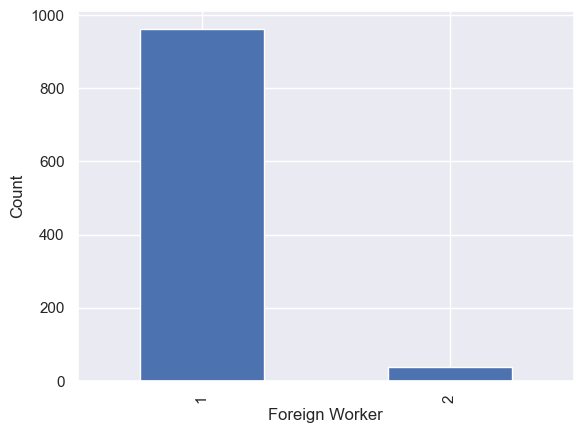

In [226]:
dataset1.Foreign_Worker.value_counts().plot.bar(xlabel="Foreign Worker", ylabel="Count")

Correlation Matrix inbetween Complete Dataframe

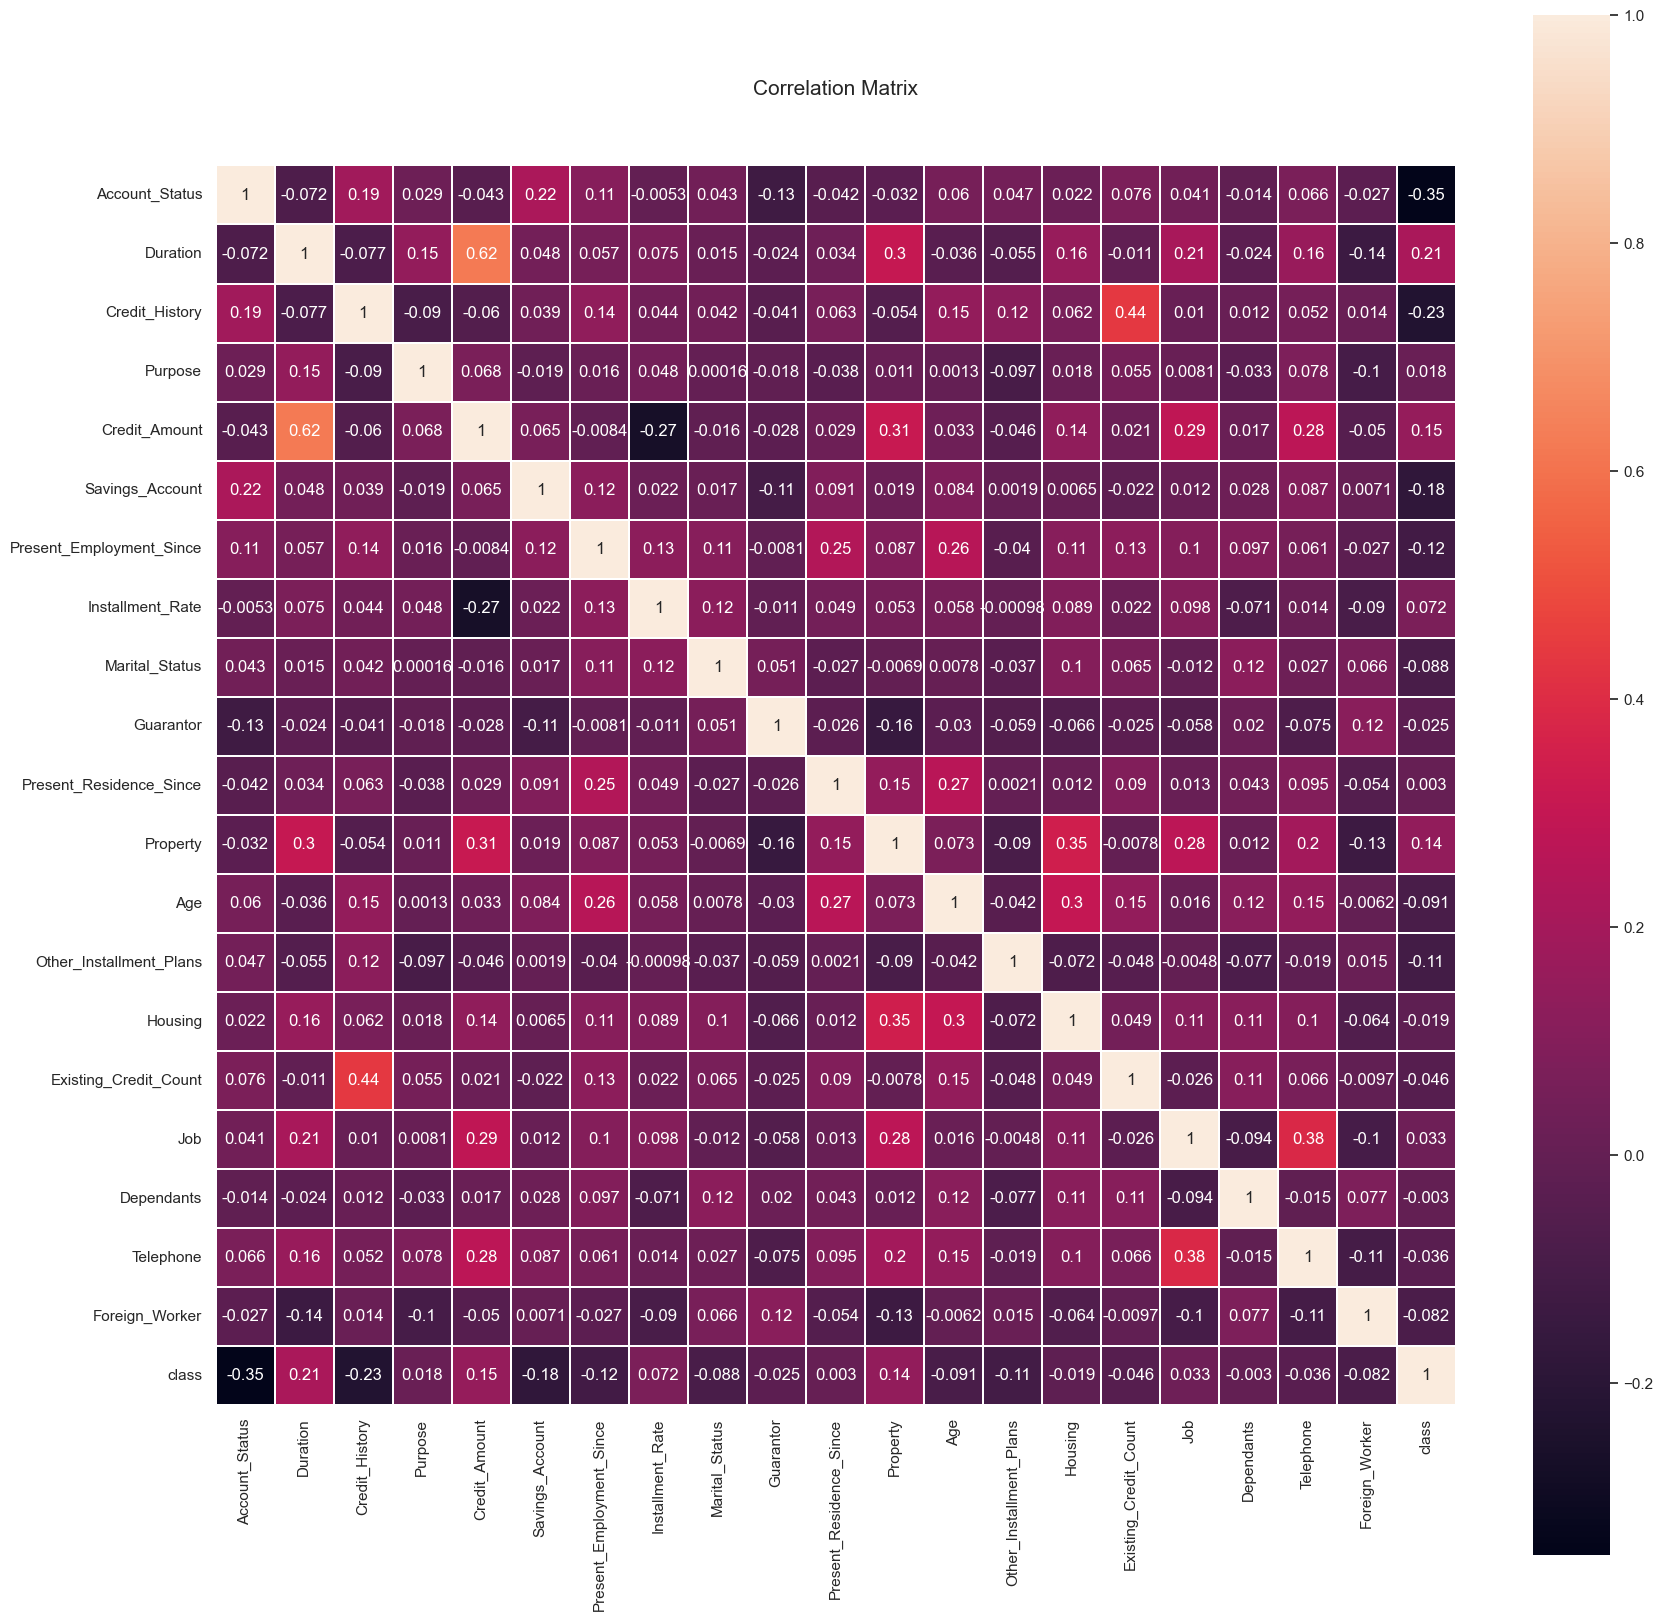

In [227]:
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix', y=1.05, size=15)
sns.heatmap(dataset1.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)
plt.show()

As per the Correlation Graph, There are several columns which are correlated to the target class column. Columns like Credit History, Credit_Amount, Property etc. are correlated

Drop the Target Column from the dataset to make it suitable for Training a Machine Learning Model


In [228]:
dataset1 = dataset1.drop(columns=['class',])

Split the Dataset in Training and Test Set

In [229]:
X_train, X_test, y_train, y_test = train_test_split(dataset1, label1, stratify=label1, random_state=0)

Get Names of All the Features/ Columns, will be useful in getting Feature importance

In [230]:
feature_names = dataset1.columns.to_list()
feature_names

['Account_Status',
 'Duration',
 'Credit_History',
 'Purpose',
 'Credit_Amount',
 'Savings_Account',
 'Present_Employment_Since',
 'Installment_Rate',
 'Marital_Status',
 'Guarantor',
 'Present_Residence_Since',
 'Property',
 'Age',
 'Other_Installment_Plans',
 'Housing',
 'Existing_Credit_Count',
 'Job',
 'Dependants',
 'Telephone',
 'Foreign_Worker']

Initialise and Train a Random Forest Classifier

In [231]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

/var/folders/k6/kpxlcm0137lgtl2_knbhnkgh0000gn/T/ipykernel_2700/361621852.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Test the Accuracy of Model

In [232]:
ypred_rfc = rfc.predict(X_test)
rfc_accuracy = accuracy_score(ypred_rfc, y_test)

print(rfc_accuracy*100, "%")

75.2 %


Get Feature Importances

In [233]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

Get Feature Importance with Feature Names

In [234]:
feature_importances = pd.Series(importances, index=feature_names)
feature_importances = feature_importances.sort_values()
feature_importances


Foreign_Worker              0.004287
Dependants                  0.011917
Telephone                   0.020184
Existing_Credit_Count       0.020553
Guarantor                   0.020958
Job                         0.027995
Housing                     0.029518
Other_Installment_Plans     0.030913
Marital_Status              0.035205
Present_Residence_Since     0.040827
Property                    0.043545
Installment_Rate            0.044613
Savings_Account             0.047152
Present_Employment_Since    0.054515
Credit_History              0.066130
Purpose                     0.070033
Duration                    0.092507
Age                         0.099128
Account_Status              0.103500
Credit_Amount               0.136518
dtype: float64

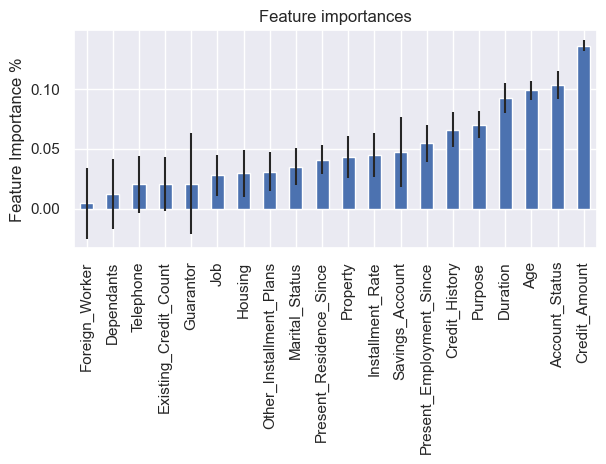

In [248]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature Importance %")
fig.tight_layout()

In [236]:

# forest_importances.to_csv("importances/feature_importances1.csv", index_label=False)

features_df = pd.DataFrame({"Feature": feature_importances.index, "Importance": feature_importances.values})
features_df

,Feature,Importance
0,Foreign_Worker,0.004287
1,Dependants,0.011917
2,Telephone,0.020184
3,Existing_Credit_Count,0.020553
4,Guarantor,0.020958
5,Job,0.027995
6,Housing,0.029518
7,Other_Installment_Plans,0.030913
8,Marital_Status,0.035205
9,Present_Residence_Since,0.040827


In [237]:
features_df.to_csv("importances/feature_importances1.csv", index_label=False)